# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Contenido

* [Introducción](#intro)
    * [Objetivos](#objetivos)
    * [Etapas](#etapas)
* [1 Diccionario de Datos](#diccionario)
    * [1.1 Inicialización](#inicio)
    * [1.2 Cargar los datos](#carga_datos)
* [2 Preparar los datos](#preparar_datos)
    * [2.1 Tarifas](#tarifas)
    * [2.2 Corregir datos](#corregir_datos)
    * [2.3 Enriquecer los datos](#enriquecer_datos)
    * [2.4 Usuarios/as](#usuarios)
        * [2.4.1 Corregir los datos](#corregir_usuarios)
        * [2.4.2 Enriquecer los datos](#enriquecer_usuarios)
     * [3 Llamadas](#llamadas)
         * [3.1 Corregir los datos](#corregir_llamadas)
         * [3.2 Enriquecer los datos](#enriquecer_llamadas)
     * [4 Mensajes](#mensajes)
         * [4.1 Corregir los datos](#corregir_mensajes)
         * [4.2 Enriquecer los datos](#enriquecer_mensajes)
     * [5 Internet](#internet)
         * [5.1 Corregir los datos](#corregir_internet)
         * [5.2 Enriquecer los datos](#enriquecer_internet)
     * [6 Estudiar las condiciones de la Tarifa](#condiciones_tarifa)
     * [7 Estudia el comportamiento de usuario](#usuario_comportamiento)
         * [7.1 Llamadas](#llamadas_comportamiento)
         * [7.2 Mensajes](#mensajes_comportamiento)
         * [7.3 Internet](#internet_comportamiento)
     * [8 Ingreso](#ingreso)
     * [9 Prueba de hipótesis](#hipotesis)
     * [10 Resumen general de los pasos realizados](#pasos)
     * [11 Conclusiones Generales](#conclusion)

# Introducción <a class="anchor" id="intro"></a>
La empresa de telecomunicaciones Megaline ofrece a sus cliente dos tipos de tarifas de prepago, Surf y Ultimate. Se va a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Se tienen los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Se analiza el comportamiento de los clientes y se determina qué tarifa de prepago genera más ingresos.

A continuación se desglosa una breve descripción para cada tarifa:  
Surf  
Pago mensual: \$20
* 500 minutos al mes, 50 SMS y 15 GB de datos  
* Si se exceden los límites del paquete:  
    1 minuto: 3 centavos  
    1 SMS: 3 centavos  
    1 GB de datos: \$10  
    
Ultimate  
Pago mensual: \$70
* 3000 minutos al mes, 1000 SMS y 30 GB de datos  
* Si se exceden los límites del paquete:  
    1 minuto: 1 centavo  
    1 SMS: 1 centavo  
    1 GB de datos: \$7 
    
El departamento desea saber cual tarifa genera más ingresos y con base en los resultados del análisis ajustar el presupuesto de publicidad.  
 

## Objetivos: <a id='objetivos'></a>
* Determinar los ingresos por usuario o usuaria de acuerdo al consumo de minutos, SMS y volumen de datos.
* Conocer el comportamiento del uso de los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes.
* Identificar la cantidad de usuarios de cada tarifa de acuerdo a la región y el ingreso promedio. 

## Etapas: <a id='etapas'></a>
Se tiene un total de Datasets con la información de los usuarios de la empresa de telecomunicaciones Megaline, no hay información previa sobre la calidad de los datos, por lo tanto se revisará antes de comenzar a analizar los datos.  

Pasos a realizar:
1. Importar las librerías necesarias
2. Descripción de los datos, leer y guardar los Datasets con Pandas.
3. Procesamiento de los datos, preparar los datos para que sean analizados. Se buscarán valores ausentes y duplicados, además en donde sea necesario se cambiarán los tipos de datos.  
4. Análisis de datos, formulación de hipótesis y creación de gráficos.

# 1 Diccionario de Datos <a id='diccionario'></a>

En este proyecto se tienen cinco tablas diferentes.  

1. La tabla `users` (datos sobre los usuarios):  
    *user_id*: identificador único del usuario.  
    *first_name*: nombre del usuario.  
    *last_name*: apellido del usuario.  
    *age*: edad del usuario (en años).  
    *reg_date*: fecha de suscripción (dd, mm, aa).  
    *churn_date*: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando     cuando fue extraída esta base de datos).  
    *city*: ciudad de residencia del usuario.  
    *plan*: nombre de la tarifa.  

2. La tabla `calls` (datos sobre las llamadas):  
    *id*: identificador único de la llamada.  
    *call_date*: fecha de la llamada.  
    *duration*: duración de la llamada (en minutos).  
    *user_id*: el identificador del usuario que realiza la llamada.  

3. La tabla `messages` (datos sobre los SMS):  
    *id*: identificador único del SMS.  
    *message_date*: fecha del SMS.  
    *user_id*: el identificador del usuario que manda el SMS.  

4. La tabla `internet` (datos sobre las sesiones web):  
    *id*: identificador único de la sesión.  
    *mb_used*: el volumen de datos gastados durante la sesión (en megabytes).  
    *session_date*: fecha de la sesión web.  
    *user_id*: identificador del usuario.  

5. La tabla `plans` (datos sobre las tarifas):  
    *plan_name*: nombre de la tarifa.  
    *usd_monthly_fee*: pago mensual en dólares estadounidenses.  
    *minutes_included*: minutos incluidos al mes.  
    *messages_included*: SMS incluidos al mes.  
    *mb_per_month_included*: datos incluidos al mes (en megabytes).  
    *usd_per_minute*: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).  
    *usd_per_message*: precio por SMS tras exceder los límites del paquete.  
    *usd_per_gb*: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).  

## 1.1 Inicialización <a id='inicio'></a>

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt


## 1.2 Cargar datos <a id='carga_datos'></a>

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('files/datasets/megaline_users.csv')
df_calls = pd.read_csv('files/datasets/megaline_calls.csv')
df_messages = pd.read_csv('files/datasets/megaline_messages.csv')
df_internet = pd.read_csv('files/datasets/megaline_internet.csv')
df_plans = pd.read_csv('files/datasets/megaline_plans.csv')


## 2 Preparar los datos <a id='preparar_datos'></a>

## 2.1 Tarifas <a id='tarifas'></a>

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<span style="color:darkgreen">
El Dataframe tiene un total de 8 columnas con 2 filas solamente, no hay datos ausentes y tampoco duplicados. Se puede concluir con lo anterior, debido a que es un DataFrame pequeño y se puede observar  simple vista.
</span>

## 2.2 Corregir datos <a id='corregir_datos'></a>

<span style="color:darkgreen">
No es necesario hacer correciones al DataFrame
</span>

## 2.3 Enriquecer los datos <a id='enriquecer_datos'></a>

<span style="color:darkgreen">
Se cambia la columna de `mb_per_month_included` a Gigabytes.  
    
También se cambia el nombre de la columna de `mb_per_month_included` a `gb_per_month_included`
</span>

In [5]:
# La columna 'mb_per_month_included' se divide entre 1024 para transformar a gigabytes
# Así quedan 15 y 30 gb para el plan Surf y el plan Ultimate, respectivamente
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
# Se renombra la columna 'mb_per_month_included'
df_plans = df_plans.rename(columns= {'mb_per_month_included':'gb_per_month_included'})
df_plans


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## 2.4 Usuarios/as <a id='usuarios'></a>

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Se imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
# se usa el método describe para una exploración de los datos (estadísticas descriptivas)
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [9]:
# Se hace una exploración de los datos de la columna 'plan' con describe()
df_users['plan'].describe()

count      500
unique       2
top       surf
freq       339
Name: plan, dtype: object

In [10]:
# Se comprueba si hay datos nulos
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [11]:
# Se comprueba si hay datos duplicados
df_users.duplicated().sum()

0

<span style="color:darkgreen"> El Dataframe de usuarios tiene 500 filas y 8 columnas, las columnas `reg_date` y `churn_date` no tiene el tipo de datos de fecha, es necesario cambiar el tipo de dato de estas columnas, además, la columna `churn_date` tiene valores ausentes, pero estos valores ausentes significan que la tarifa se estaba usando cuando fue extraída esta base de datos, por lo que no se eliminarán o sustituiran con otro valor.  
La edad promedio de los usuarios o usuarias es de 45 años, el cliente más jóven tiene 18 años, mientras que el cliente de mayor edad tiene 75 años.  
El plan Surf es el más frecuente entre los usuarios o usuarias.  
También, la columna `city` tiene la ciudad y el estado del usuario, ésta columna se puede dividir para tener una columna únicamente con la ciudad y otra con el estado.
</span>

### 2.4.1 Corregir los datos <a id='corregir_usuarios'></a>

In [12]:
# Se cambia el tipo de dato de la columna 'reg_date' y 'churn_date' con el método to_datetime()
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

In [13]:
# Con el atributo dtypes se verifica el cambio de tipos de datos de las columnas 'reg_date' y 'churn_date'
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

### 2.4.2 Enriquecer los datos <a id='enriquecer_usuarios'></a>

In [14]:
# Ahora se divide la columna 'city' para separar la ciudad y el estado
# También se crea una nueva columna para el/los estados
# Se emplea str.split() para realizar dicha tarea
df_users[['city', 'state']] = df_users.city.str.split(', ', expand= True)

In [15]:
# Se muestran los 3 primeros valores del DataFrame
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA


<span style="color:darkgreen"> En la columna `state` se observa que el nombre de los estados está acompañado con **MSA**, para saber el significado de dicho texto sería necesario preguntar al equipo que capturó los datos, sin embargo, para fines de este proyecto no es relevante y sólo nos interesa el estado, por lo tanto se eliminará de la columna.
</span>

In [16]:
# Para reemplazar MSA de la columna 'state' se hace mediante str.replace(' MSA','')
df_users['state'] = df_users['state'].str.replace(' MSA','')

In [17]:
# Se imprime una muestra de datos del DataFrame de los usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA


<div class="alert alert-block alert-info">
<b> </b> <a class="tocSkip"></a>  

Para los datos nulos en la columna `churn_date` se decidió no completarlos o llenarlos con otra información, porque son clientes aún estaba usando el servicio. Por tanto, estos valores nulos significan que los usuarios aún están usando el servicio.
</div>


<span style="color:green"> Ahora ya se tiene la ciudad y el estado en columnas separadas.
</span>

## 3 Llamadas <a id='llamadas'></a>

In [18]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [20]:
# se usa el método describe para una exploración de los datos (estadísticas descriptivas)
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [21]:
# Se verifica si hay valores nulos y duplicados
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [22]:
df_calls.duplicated().sum()

0

<span style="color:green"> Se tienen 4 columnas con 137735 filas, la columna `id` tiene un tipo de dato *object*, pero está combinado con el **user_id**, por lo tanto se dejarán así esos datos. La columna `call_date` tiene un tipo de dato *object* por lo tanto se cambiará a tipo fecha (datetime). Con los métodos `isna().sum()` y `duplicated().sum()` se verificó si hay valores nulos en el DataFrame y no los hay en este caso.
</span>

### 3.1 Corregir los datos <a id='corregir_llamadas'></a>

In [23]:
# Se cambia el tipo de dato de la columna 'call_date' con el método to_datetime()
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [24]:
# Con el atributo dtypes se verifica el cambio de tipos de datos de las columnas 'reg_date' y 'churn_date'
df_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

### 3.2 Enriquecer los datos <a id='enriquecer_llamadas'></a>

<span style="color:green"> Se crea una columna para el mes en que se hizo la llamada.
</span>

In [25]:
# Se crea la columna 'call_month' y se usa el atributo df.month sobre la columna 'call_date' para extraer únicamente el mes
df_calls['call_month'] = df_calls['call_date'].dt.month

In [26]:
df_calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [27]:
# Hay llamadas con una duración de cero, por lo tanto se conservan los datos que sean diferentes de cero en la duración
df_calls = df_calls[~(df_calls['duration'] == 0.0)]
df_calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [28]:
# Los minutos se redondean al entero superior inmediato con ceil() de numpy
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


## 4 Mensajes <a id='mensajes'></a>

In [29]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [31]:
# Se verifica si hay valores nulos y duplicados
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [32]:
df_messages.duplicated().sum()

0

<span style="color:green"> Se tienen 3 columnas con 76051 filas, la columna `id` tiene un tipo de dato *object*, también está combinado con el **user_id**, por lo tanto se dejarán así esos datos. La columna `message_date` tiene un tipo de dato *object* por lo tanto se cambiará a tipo fecha (datetime). Con los métodos `isna().sum()` y `duplicated().sum()` se verificó si hay valores nulos en el DataFrame y no los hay en este caso.
</span>

### 4.1 Corregir los datos <a id='corregir_mensajes'></a>

In [33]:
# Se cambia el tipo de dato de la columna 'message_date' con el método to_datetime()
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [34]:
# Con el atributo dtypes se verifica el cambio de tipos de datos 
df_messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

### 4.2 Enriquecer los datos <a id='enriquecer_mensajes'></a>

<span style="color:green"> Se crea una columna para el mes en que se envío el mensaje.
</span>

In [35]:
# Se crea la columna 'message_month' y se usa el atributo df.month sobre la columna 'message_date' para extraer únicamente el mes
df_messages['message_month'] = df_messages['message_date'].dt.month

In [36]:
df_messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## 5 Internet <a id='internet'></a>

In [37]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [38]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [39]:
# se usa el método describe para una exploración de los datos (estadísticas descriptivas)
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [40]:
# Se verifica si hay valores nulos y duplicados
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [41]:
df_internet.duplicated().sum()

0

In [42]:
# Se verifica si hay usuarios que no usaron internet
# Se filtra el DataFrame
df_internet[df_internet['mb_used'] == 0].head()

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0


<span style="color:green"> Se tienen 4 columnas con 104825 filas, la columna `id` tiene un tipo de dato *object*, también está combinado con el **user_id**, por lo tanto se dejarán así esos datos. La columna `session_date` tiene un tipo de dato *object* por lo tanto se cambiará a tipo fecha (datetime). Con los métodos `isna().sum()` y `duplicated().sum()` se verificó si hay valores nulos en el DataFrame y no los hay en este caso. En promedio los usuarios o usuarias usan 366 mb.
</span>

### 5.1 Corregir los datos <a id='corregir_internet'></a>

In [43]:
# Se cambia el tipo de dato de la columna 'message_date' con el método to_datetime()
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [44]:
# Con el atributo dtypes se verifica el cambio de tipos de datos 
df_internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

### 5.2 Enriquecer los datos <a id='enriquecer_internet'></a>

<span style="color:green"> Se crea una columna para el mes de la sesión.
</span>

In [45]:
# Se crea la columna 'session_month' y se usa el atributo df.month sobre la columna 'session_date' para extraer únicamente el mes
df_internet['session_month'] = df_internet['session_date'].dt.month

In [46]:
# Se conservan los datos donde los usuarios si tuvieron consumo de interntet
# Se filtra el DataFrame
df_internet = df_internet[~(df_internet['mb_used'] == 0)]
df_internet.head()

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8


In [47]:
# Se Transforman los megabytes a gigabytes
df_internet['mb_used'] = df_internet['mb_used']/1024
# se renombra la columna 
df_internet = df_internet.rename(columns= {'mb_used':'gb_used'})

In [48]:
# Se redondea al entero superior inmediato
df_internet['gb_used'] = df_internet['gb_used'].apply(np.ceil)
df_internet.head()

,id,user_id,session_date,gb_used,session_month
0,1000_13,1000,2018-12-29,1.0,12
2,1000_379,1000,2018-12-28,1.0,12
3,1000_413,1000,2018-12-26,1.0,12
4,1000_442,1000,2018-12-27,1.0,12
5,1001_0,1001,2018-08-24,1.0,8


## 6 Estudiar las condiciones de las tarifas <a id='condiciones_tarifa'></a>

In [49]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [50]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Se hace un merge de los DataFrames df_users y df_calls para complementar la información
merge_users_calls = df_users.merge(df_calls, on= 'user_id')
merge_users_calls.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,id,call_date,duration,call_month
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_93,2018-12-27,9.0,12
1,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_145,2018-12-27,14.0,12
2,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_247,2018-12-27,15.0,12
3,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_309,2018-12-28,6.0,12
4,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_380,2018-12-30,5.0,12


In [51]:
# Se agrupan las llamadas por usuarios y mes, se contabilizan las llamadas hechas con count()
# El Series resultante se asigna a num_calls
num_calls = merge_users_calls.groupby(['user_id', 'plan', 'call_month'])['duration'].count()
num_calls

user_id  plan      call_month
1000     ultimate  12            16
1001     surf      8             22
                   9             38
                   10            47
                   11            49
                                 ..
1498     surf      12            32
1499     surf      9             35
                   10            41
                   11            39
                   12            56
Name: duration, Length: 2256, dtype: int64

In [52]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Se agrupan las llamadas por usuarios y mes, se suman los minutos de las llamadas hechas con sum()
# El Series resultante se asigna a sum_minutes
sum_minutes = merge_users_calls.groupby(['user_id', 'plan', 'call_month'])['duration'].sum()
sum_minutes

user_id  plan      call_month
1000     ultimate  12            124.0
1001     surf      8             182.0
                   9             315.0
                   10            393.0
                   11            426.0
                                 ...  
1498     surf      12            339.0
1499     surf      9             346.0
                   10            385.0
                   11            308.0
                   12            496.0
Name: duration, Length: 2256, dtype: float64

In [53]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Se hace un merge de los DataFrames df_users y df_messages para complementar la información
merge_users_messages = df_users.merge(df_messages, on= 'user_id')
merge_users_messages.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,id,message_date,message_month
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_125,2018-12-27,12
1,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_160,2018-12-31,12
2,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_223,2018-12-31,12
3,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_251,2018-12-27,12
4,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_255,2018-12-26,12


In [54]:
# Se agrupan los mensajes por usuarios y mes, se contabilizan los mensajes enviados con count() de la columna 'id'
# El Series resultante se asigna a sum_minutes
count_messages = merge_users_messages.groupby(['user_id','plan', 'message_month'])['id'].count()
count_messages

user_id  plan      message_month
1000     ultimate  12               11
1001     surf      8                30
                   9                44
                   10               53
                   11               36
                                    ..
1496     surf      9                21
                   10               18
                   11               13
                   12               11
1497     ultimate  12               50
Name: id, Length: 1806, dtype: int64

In [55]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Se hace un merge de los DataFrames df_users y df_internet para complementar la información
merge_users_internet = df_users.merge(df_internet, on= 'user_id')
merge_users_internet.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,id,session_date,gb_used,session_month
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_13,2018-12-29,1.0,12
1,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_379,2018-12-28,1.0,12
2,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_413,2018-12-26,1.0,12
3,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA,1000_442,2018-12-27,1.0,12
4,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA,1001_0,2018-08-24,1.0,8


In [56]:
# Se agrupan el el volumen del tráfico de Internet usado por usuarios y mes, se contabilizan se suman los datos con sum() de la columna 'mb_used'
# El Series resultante se asigna a sum_internet
sum_internet = merge_users_internet.groupby(['user_id', 'plan', 'session_month'])['gb_used'].sum()
sum_internet

user_id  plan      session_month
1000     ultimate  12                4.0
1001     surf      8                21.0
                   9                41.0
                   10               50.0
                   11               49.0
                                    ... 
1498     surf      12               56.0
1499     surf      9                37.0
                   10               52.0
                   11               43.0
                   12               58.0
Name: gb_used, Length: 2277, dtype: float64

In [57]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Los Series num_calls, sum_minutes, count_message y sum_internet se concatenan con concat, con axis= 'columns' para asegurarnos de que se combinaran como columnas
calls_mints_internet = pd.concat([num_calls, sum_minutes, count_messages, sum_internet], axis='columns')
# Se renombran las columnas
calls_mints_internet.columns = ['total_calls', 'sum_minutes', 'count_messages', 'vol_internet']
# con reset_index() se reinicia el índice del DataFrame calls_mints_internet
calls_mints_internet.reset_index(inplace= True)

In [58]:
# Se imprime una muestra de datos del DataFrame calls_mints_internet
calls_mints_internet.head()

,user_id,plan,level_2,total_calls,sum_minutes,count_messages,vol_internet
0,1000,ultimate,12,16.0,124.0,11.0,4.0
1,1001,surf,8,22.0,182.0,30.0,21.0
2,1001,surf,9,38.0,315.0,44.0,41.0
3,1001,surf,10,47.0,393.0,53.0,50.0
4,1001,surf,11,49.0,426.0,36.0,49.0


<span style="color:green"> Después de reiniciar el índice del DataFrame `calls_mints_internet`, el nombre de la columna del mes se asigno el nombre de `level_2` el cual se cambiará por `month` con el método `rename`. 
</span>

In [59]:
# Se cambia el nombre de la columna 'level_2' por 'month'
calls_mints_internet = calls_mints_internet.rename(columns= {'level_2':'month'})
# Se imprime una muestra de datos del DataFrame calls_mints_internet
calls_mints_internet.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet
0,1000,ultimate,12,16.0,124.0,11.0,4.0
1,1001,surf,8,22.0,182.0,30.0,21.0
2,1001,surf,9,38.0,315.0,44.0,41.0
3,1001,surf,10,47.0,393.0,53.0,50.0
4,1001,surf,11,49.0,426.0,36.0,49.0


In [60]:
# Se crea una función para asignar la tarifa con base al plan del usuario
def monthly_pay(plan):
    if plan == 'ultimate':
        return 70
    else:
        return 20

In [61]:
# Añade la información de la tarifa
# Se crea la columna 'monthly_pay' donde se asigna la tarifa con la función que se creó 'monthly_pay()'
# con el método apply() se aplica a la columna 'monthly_pay'
calls_mints_internet['monthly_pay'] = calls_mints_internet['plan'].apply(monthly_pay)


In [62]:
# Se imprime una muestra de datos del DataFrame calls_mints_internet, esta ocasión usando el método sample()
calls_mints_internet.sample(10)

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay
2051,1451,ultimate,11,68.0,600.0,60.0,35.0,70
1347,1296,ultimate,12,43.0,369.0,24.0,41.0,70
802,1171,surf,11,32.0,295.0,NaN,58.0,20
2004,1439,surf,8,46.0,351.0,70.0,38.0,20
2160,1476,ultimate,11,41.0,411.0,35.0,28.0,70
1106,1241,surf,12,63.0,582.0,45.0,25.0,20
1078,1236,ultimate,4,40.0,273.0,28.0,42.0,70
2110,1466,surf,11,24.0,202.0,38.0,40.0,20
1277,1278,surf,12,42.0,393.0,24.0,62.0,20
2007,1439,surf,11,35.0,345.0,70.0,41.0,20


In [63]:
# se verifican los datos nulos
calls_mints_internet.isna().sum()

user_id             0
plan                0
month               0
total_calls        37
sum_minutes        37
count_messages    487
vol_internet       16
monthly_pay         0
dtype: int64

<span style="color:green"> Al fusionar los datos de las llamadas, minutos, mensajes e Internet, en algunos casos algunos valores son nulos (`NaN`), ya que en algunos casos en determinado mes el usuario o usuaria sólo usó los minutos para llamadas, mensajes o Internet, los otros servicios no los usó, los cuales se reemplazarán con 0.
</span>

In [64]:
calls_mints_internet.fillna(0, inplace= True)

<span style="color:green"> Para calcular los ingresos mensuales por usuario o usuaria, se crea un función para  calcular los el costo de los minutos extra, el costo de los mensajes extra y los gibabytes extra, es decir tres funciones para cada cálculo.  Y otra función será `total_pay()` lo que hará es sumar el costo extra de los minutos, mensajes e internet a la tarifa mensual del plan.
</span>

In [65]:
def extra_minutes(minutes_used, plan_name, plan_limit):
    '''
    Función para calcular el costo de los minutos extra de acuerdo al plan. Si el cliente usa menos o la misma
    cantidad de minutos de llamada no se le cobra nada extra, pero si se exceden los límites del 
    paquete se calculan los recursos extra que se hayan excedido y se devuelve ese valor/costo extra.
    '''
    if plan_name == 'ultimate':
        if minutes_used <= plan_limit:
            return 0
        else:
            minutes_extra = minutes_used - plan_limit
            return minutes_extra * 0.01
    else:
        if minutes_used <= plan_limit:
            return 0
        else:
            minutes_extra = minutes_used - plan_limit
            return minutes_extra * 0.03
        
def extra_messages(messages_used, plan_name, plan_limit):
    '''
    Función para calcular el costo de los mensajes extra de acuerdo al plan. Si el cliente usa menos o la misma
    cantidad de mensajes no se le cobra nada extra, pero si se exceden los límites del 
    paquete se calculan los recursos extra que se hayan excedido y se devuelve ese valor/costo extra.
    '''
    if plan_name == 'ultimate':
        if messages_used <= plan_limit:
            return 0
        else:
            messages_extra = messages_used - plan_limit
            return messages_extra * 0.01
    else:
        if messages_used <= plan_limit:
            return 0
        else:
            messages_extra = messages_used - plan_limit
            return messages_extra * 0.03
        
def extra_internet(internet_used, plan_name, plan_limit):
    '''
    Función para calcular el costo del internet o gigas extra de acuerdo al plan. Si el cliente usa menos o la misma
    cantidad de gigabytes no se le cobra nada extra, pero si se exceden los límites del 
    paquete se calculan los recursos extra que se hayan excedido y se devuelve ese valor/costo extra.
    '''
    if plan_name == 'ultimate':
    
        if internet_used <= plan_limit:
            return 0
        else:
            internet_extra = internet_used - plan_limit
            return internet_extra * 7
    else:
        if internet_used <= plan_limit:
            return 0
        else:
            internet_extra = internet_used - plan_limit
            return internet_extra * 10

def total_pay(df):
    '''
    Función que calcula el total del pago, se suman los recursos extra a la tarifa base de acuerdo al plan.
    '''
    plan = df['plan']
    minutos = df['sum_minutes']
    mensajes = df['count_messages']
    internet = df['vol_internet']

    if plan == 'ultimate':
        
        minutes_extra_usd = extra_minutes(minutos, plan, 3000) # costo de los minutos extra
        messages_extra_usd = extra_messages(mensajes, plan, 1000) # costo de los mensajes extra
        internet_extra_usd = extra_internet(internet, plan, 30) # costo de los gigas extra
        total_pay = 70 + minutes_extra_usd + messages_extra_usd + internet_extra_usd # pago total

    else:
        minutes_extra_usd = extra_minutes(minutos, plan, 500)
        messages_extra_usd = extra_messages(mensajes, plan, 50)
        internet_extra_usd = extra_internet(internet, plan, 15)
        total_pay = 20 + minutes_extra_usd + messages_extra_usd + internet_extra_usd

    return total_pay

In [66]:
# Calcula el ingreso mensual para cada usuario
# se crea una columna nueva 'usd_total_pay'
# se emplea el método apply() con la función total_pay() sobre el DataFrame 'calls_mints_internet'
# apply() se usa con axis= 1 para que pase los valores de fila de la función
calls_mints_internet['usd_total_pay'] = calls_mints_internet.apply(total_pay, axis= 1)

In [67]:
# Se imprime una muestra de datos del DataFrame calls_mints_internet
calls_mints_internet.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay,usd_total_pay
0,1000,ultimate,12,16.0,124.0,11.0,4.0,70,70.00
1,1001,surf,8,22.0,182.0,30.0,21.0,20,80.00
2,1001,surf,9,38.0,315.0,44.0,41.0,20,280.00
3,1001,surf,10,47.0,393.0,53.0,50.0,20,370.09
4,1001,surf,11,49.0,426.0,36.0,49.0,20,360.00


<span style="color:green"> Ahora el DataFrame `calls_mints_internet` tiene los ingresos mensuales por usuario, esta tarea fue más facil de realizar debido a la función `total_pay()` que se creó.
</span>

## 7 Estudia el comportamiento de usuario <a id='usuario_comportamiento'></a>

### 7.1 Llamadas <a id='llamadas_comportamiento'></a>

In [68]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla. 
# Se filtra el DataFrame sólo para el plan surf y se guarda en surf_plan
surf_plan = calls_mints_internet[calls_mints_internet['plan'] == 'surf']
surf_plan.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay,usd_total_pay
1,1001,surf,8,22.0,182.0,30.0,21.0,20,80.00
2,1001,surf,9,38.0,315.0,44.0,41.0,20,280.00
3,1001,surf,10,47.0,393.0,53.0,50.0,20,370.09
4,1001,surf,11,49.0,426.0,36.0,49.0,20,360.00
5,1001,surf,12,46.0,412.0,44.0,55.0,20,420.00


In [69]:
# Se filtra el DataFrame sólo para el plan ultimate y se guarda en ultimate_plan
ultimate_plan = calls_mints_internet[calls_mints_internet['plan'] == 'ultimate']
ultimate_plan.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay,usd_total_pay
0,1000,ultimate,12,16.0,124.0,11.0,4.0,70,70.0
19,1006,ultimate,11,2.0,10.0,15.0,7.0,70,70.0
20,1006,ultimate,12,7.0,59.0,139.0,62.0,70,294.0
26,1008,ultimate,10,54.0,476.0,21.0,48.0,70,196.0
27,1008,ultimate,11,50.0,446.0,37.0,56.0,70,252.0


In [70]:
# Se agrupa por mes el DataFrame 'surf_plan' y se calcula el promedio de los minutos de las llamadas (columna 'sum_minutes')
# EL resultado se asigna a 'month_surf_mean'
month_surf_mean = surf_plan.groupby('month')['sum_minutes'].mean()
month_surf_mean

month
1     203.000000
2     297.000000
3     330.000000
4     351.540000
5     399.584416
6     431.298969
7     449.983471
8     410.111111
9     414.226804
10    429.729958
11    423.325088
12    473.836478
Name: sum_minutes, dtype: float64

In [71]:
# Se agrupa por mes el DataFrame 'month_ultimate_mean' y se calcula el promedio de los minutos de las llamadas (columna 'sum_minutes')
# EL resultado se asigna a 'month_ultimate_mean'
month_ultimate_mean = ultimate_plan.groupby('month')['sum_minutes'].mean()
month_ultimate_mean

month
1     193.500000
2     403.142857
3     304.250000
4     336.857143
5     406.241379
6     370.957447
7     427.067797
8     421.436620
9     437.511628
10    450.735849
11    445.196850
12    459.099338
Name: sum_minutes, dtype: float64

In [72]:
# se concatenan los Series 'month_surf_mean' y 'month_ultimate_mean'
surf_ultimate_mean = pd.concat([month_surf_mean, month_ultimate_mean], axis='columns')
# Se renombran las columnas
surf_ultimate_mean.columns = ['min_mean_surf', 'min_mean_ultimate']
# con reset_index() se reinicia el índice del DataFrame 'surf_ultimate_mean'
surf_ultimate_mean.reset_index(inplace= True)
surf_ultimate_mean

,month,min_mean_surf,min_mean_ultimate
0,1,203.000000,193.500000
1,2,297.000000,403.142857
2,3,330.000000,304.250000
3,4,351.540000,336.857143
4,5,399.584416,406.241379
5,6,431.298969,370.957447
6,7,449.983471,427.067797
7,8,410.111111,421.436620
8,9,414.226804,437.511628
9,10,429.729958,450.735849


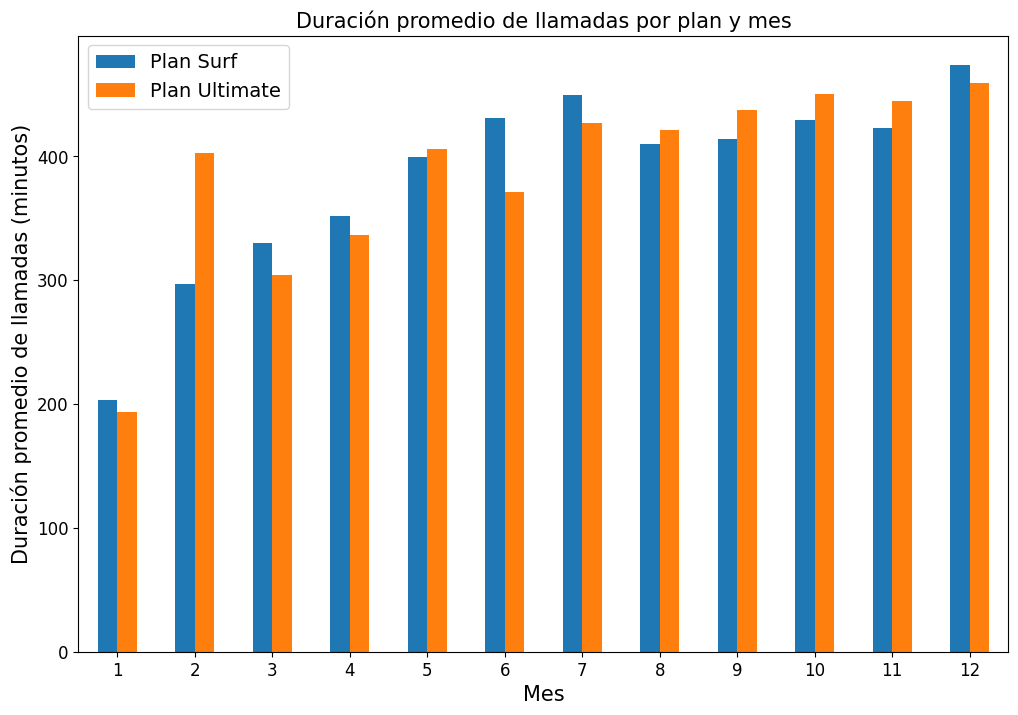

In [73]:
# Se grafica la duración promedio de llamadas por cada plan y por cada mes
surf_ultimate_mean.plot(x= 'month',
                       kind= 'bar',
                       figsize= [12,8],
                       fontsize= 12,
                       rot= 360
                       )
plt.title('Duración promedio de llamadas por plan y mes', fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Duración promedio de llamadas (minutos)', fontsize=15)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 14)
plt.show()

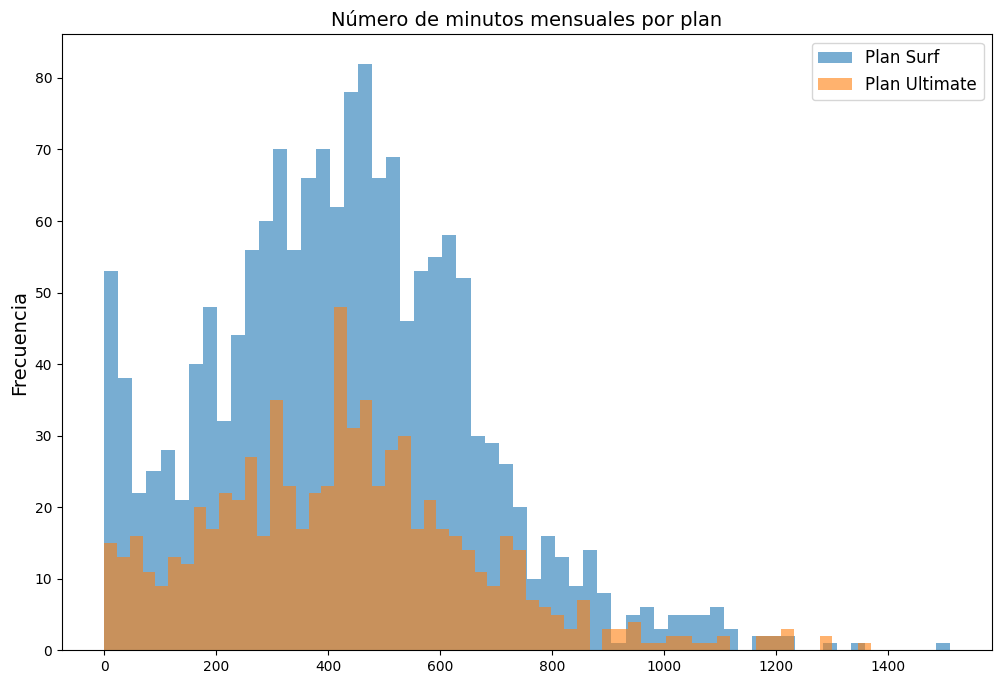

In [74]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# A partir de los DataFrames 'surf_plan' y 'ultimate_plan' se crean sus respectivos histogramas en el mismo gráfico
surf_plan['sum_minutes'].plot(kind='hist',
                              bins= 60, 
                              alpha= 0.6,
                              figsize= [12,8]
                             )
ultimate_plan['sum_minutes'].plot(kind='hist',
                              bins= 60, 
                              alpha= 0.6,
                              figsize= [12,8]
                             )


plt.title('Número de minutos mensuales por plan', fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12) # para colocar las leyendas del gráfico
plt.show()


In [76]:
print('Plan Surf:')
# Se calcula la varianza con var() de la duración mensual de llamadas.
print('La varianza de los minutos es:', round(surf_plan['sum_minutes'].var(), 1))
# se calcula la moda de los datos con mode() de la duración mensual de llamadas.
print('La moda de los minutos es:', surf_plan['sum_minutes'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(surf_plan['sum_minutes'].describe())

Plan Surf:
La varianza de los minutos es: 54968.3
La moda de los minutos es: 0    0.0
Name: sum_minutes, dtype: float64
count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: sum_minutes, dtype: float64


In [77]:
print('Plan Ultimate:')
# Se calcula la varianza con var() de la duración mensual de llamadas.
print('La varianza de los minutos es:', round(ultimate_plan['sum_minutes'].var(), 1))
# se calcula la moda de los datos con mode() de la duración mensual de llamadas.
print('La moda de los minutos es:', ultimate_plan['sum_minutes'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(ultimate_plan['sum_minutes'].describe())

Plan Ultimate:
La varianza de los minutos es: 57844.5
La moda de los minutos es: 0    0.0
Name: sum_minutes, dtype: float64
count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: sum_minutes, dtype: float64


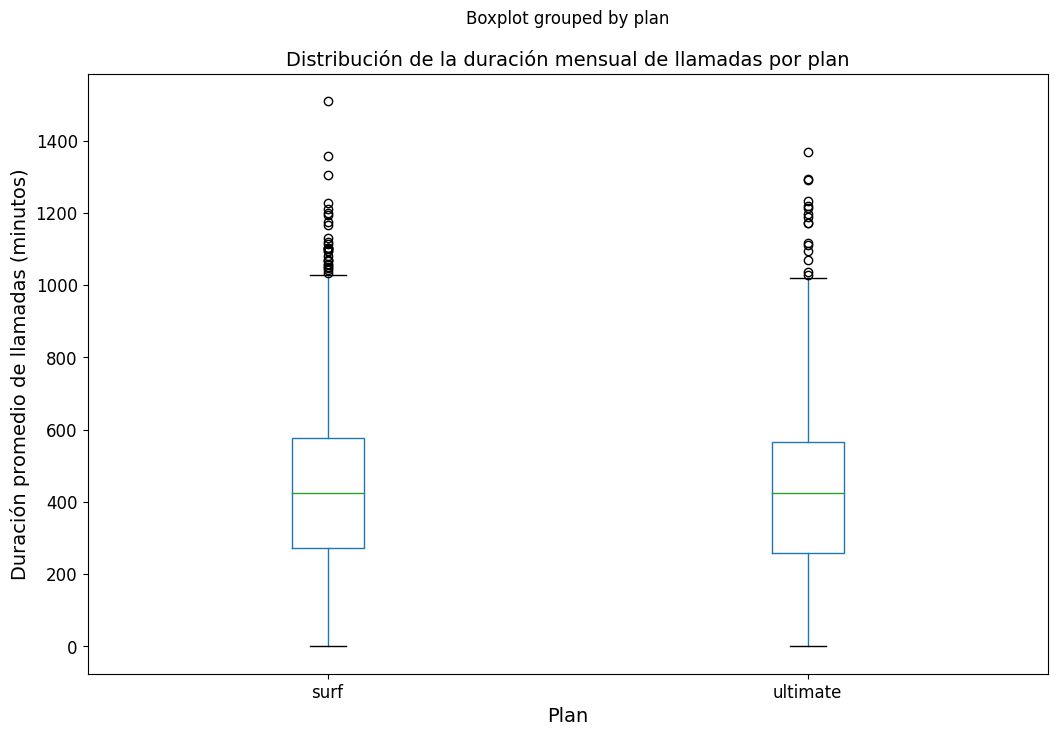

In [78]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
calls_mints_internet.boxplot(column= 'sum_minutes',
                             by= 'plan',
                             fontsize= 12,
                             grid= False,
                             figsize= [12,8]
                             )
plt.title('Distribución de la duración mensual de llamadas por plan', fontsize= 14) # para colocar un título
plt.xlabel('Plan', fontsize= 14) # Para nombrar el eje x
plt.ylabel('Duración promedio de llamadas (minutos)', fontsize= 14) # Para nombrar el eje y
plt.show()


<span style="color:green">  **Conclusiones:**  
• En el gráfico de barras se puede ver que en febrero (mes 2) hay un mayor número de minutos para los usuarios del plan Ultimate y en junio (mes 6) para los usuarios del plan Surf, para el resto de los meses no se observa una diferencia muy grande.  
• Con base en el histograma se observa que para mabos planes se observa una distribución similar, pero hay más datos para el plan surf. 
• Al calcular la media para ambos planes es muy similar y ambas tienen una varianza muy grande, esto quiere decir que los datos están muy separados de la media. Lo mismo sucede con la desviación estándar, que es de 234.4 y 240.5 para el plan Surf y Ultimate, respectivamente, lo cual indica que los datos son muy hetegéneos.  
• Con el diagrama de caja podemos observar valores atípicos, ya que hay valores mayores que el valor máximo (1.5 veces el rango intercuartílico (IQR) del cuartil Q3). Lo anterior sucede para ambos planes. Para el plan Surf el valor máximo es de 1510 y para el plan Ultimate 1369.
</span>

### 7.2 Mensajes <a id='mensajes_comportamiento'></a>

In [770]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Se agrupa por mes el DataFrame 'surf_plan' y se calcula el promedio de los mensajes (columna 'count_messages')
# EL resultado se asigna a 'month_surf_mean_messages'
month_surf_mean_messages = surf_plan.groupby('month')['count_messages'].mean()
month_surf_mean_messages


month
1     10.500000
2     12.000000
3     15.260870
4     17.400000
5     24.012987
6     25.298969
7     27.033058
8     28.777778
9     30.762887
10    33.839662
11    32.385159
12    38.600629
Name: count_messages, dtype: float64

In [771]:
# Se agrupa por mes el DataFrame 'ultimate_plan' y se calcula el promedio de los mensajes (columna 'count_messages')
# EL resultado se asigna a 'month_surf_mean_messages'
month_ultimate_mean_messages = ultimate_plan.groupby('month')['count_messages'].mean()
month_ultimate_mean_messages

month
1     15.500000
2     21.571429
3     20.250000
4     22.047619
5     32.103448
6     29.340426
7     32.830508
8     38.478873
9     37.895349
10    39.443396
11    38.606299
12    45.006623
Name: count_messages, dtype: float64

In [772]:
# se concatenan los Series 'month_surf_mean_messages' y 'month_ultimate_mean_messages'
surf_ultimate_mean_messages = pd.concat([month_surf_mean_messages, month_ultimate_mean_messages], axis='columns')
# Se renombran las columnas
surf_ultimate_mean_messages.columns = ['messages_mean_surf', 'messages_mean_ultimate']
# con reset_index() se reinicia el índice del DataFrame 'surf_ultimate_mean_messages'
surf_ultimate_mean_messages.reset_index(inplace= True)
surf_ultimate_mean_messages


,month,messages_mean_surf,messages_mean_ultimate
0,1,10.500000,15.500000
1,2,12.000000,21.571429
2,3,15.260870,20.250000
3,4,17.400000,22.047619
4,5,24.012987,32.103448
5,6,25.298969,29.340426
6,7,27.033058,32.830508
7,8,28.777778,38.478873
8,9,30.762887,37.895349
9,10,33.839662,39.443396


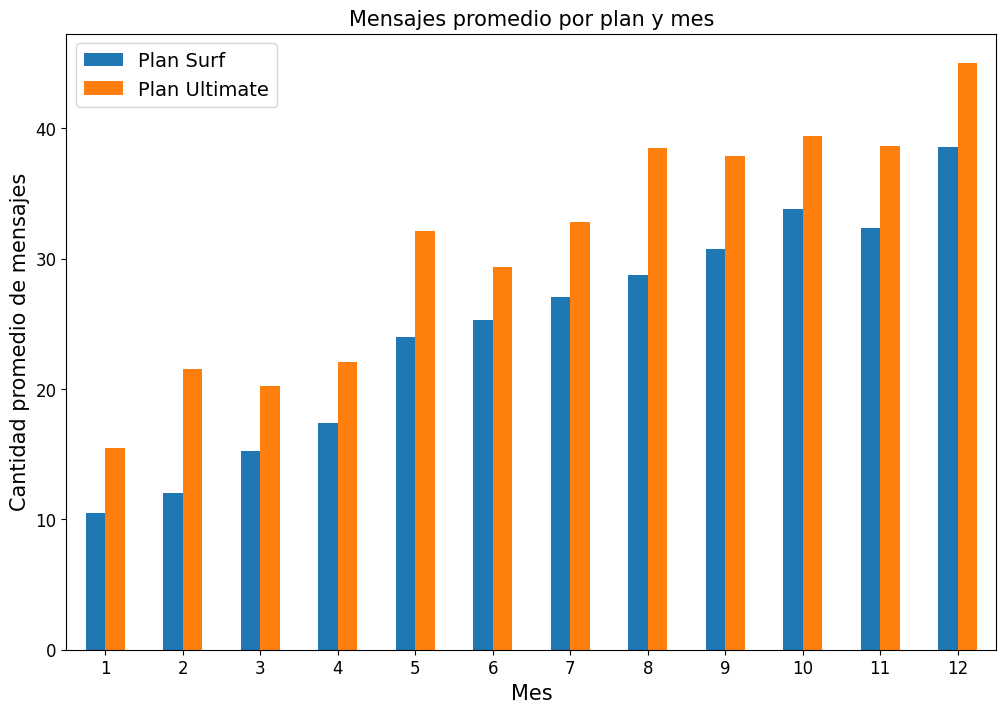

In [773]:
# Se grafica la cantidad promedio de mensajes por cada plan y por cada mes
surf_ultimate_mean_messages.plot(x= 'month',
                       kind= 'bar',
                       figsize= [12,8],
                       fontsize= 12, 
                       rot= 360
                       )
plt.title('Mensajes promedio por plan y mes', fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Cantidad promedio de mensajes', fontsize=15)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 14)
plt.show()

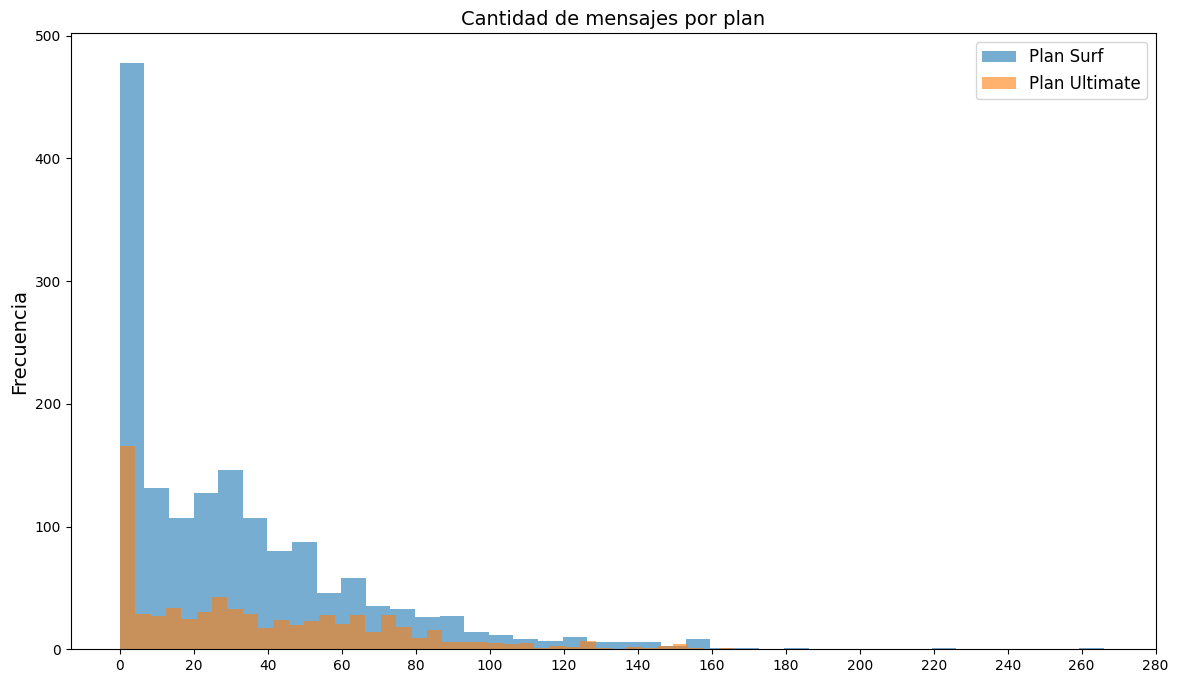

In [774]:
# A partir de los DataFrames 'surf_plan' y 'ultimate_plan' se crean sus respectivos histogramas en el mismo gráfico
surf_plan['count_messages'].plot(kind='hist',
                              bins= 40, 
                              alpha= 0.6,
                              figsize= [14,8],
                              xticks= range(0,300,20)
                             )
ultimate_plan['count_messages'].plot(kind='hist',
                              bins= 40, 
                              alpha= 0.6,
                              figsize= [14,8],
                              xticks= range(0,300,20)
                             )


plt.title('Cantidad de mensajes por plan', fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12) # para colocar las leyendas del gráfico
plt.show()

In [775]:
print('Plan Surf:')
# Se calcula la varianza con var() de la cantidad de mensajes.
print('La varianza de los minutos es:', round(surf_plan['count_messages'].var(), 1))
# se calcula la moda de los datos con mode() de la cantidad de mensajes
print('La moda de los minutos es:', surf_plan['count_messages'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(surf_plan['count_messages'].describe())

Plan Surf:
La varianza de los minutos es: 1126.7
La moda de los minutos es: 0.0
count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: count_messages, dtype: float64


In [776]:
print('Plan Ultimate:')
# Se calcula la varianza con var() de la cantidad de mensajes.
print('La varianza de los minutos es:', round(ultimate_plan['count_messages'].var(), 1))
# se calcula la moda de los datos con mode() de la cantidad de mensajes
print('La moda de los minutos es:', ultimate_plan['count_messages'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(ultimate_plan['count_messages'].describe())

Plan Ultimate:
La varianza de los minutos es: 1208.8
La moda de los minutos es: 0.0
count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: count_messages, dtype: float64


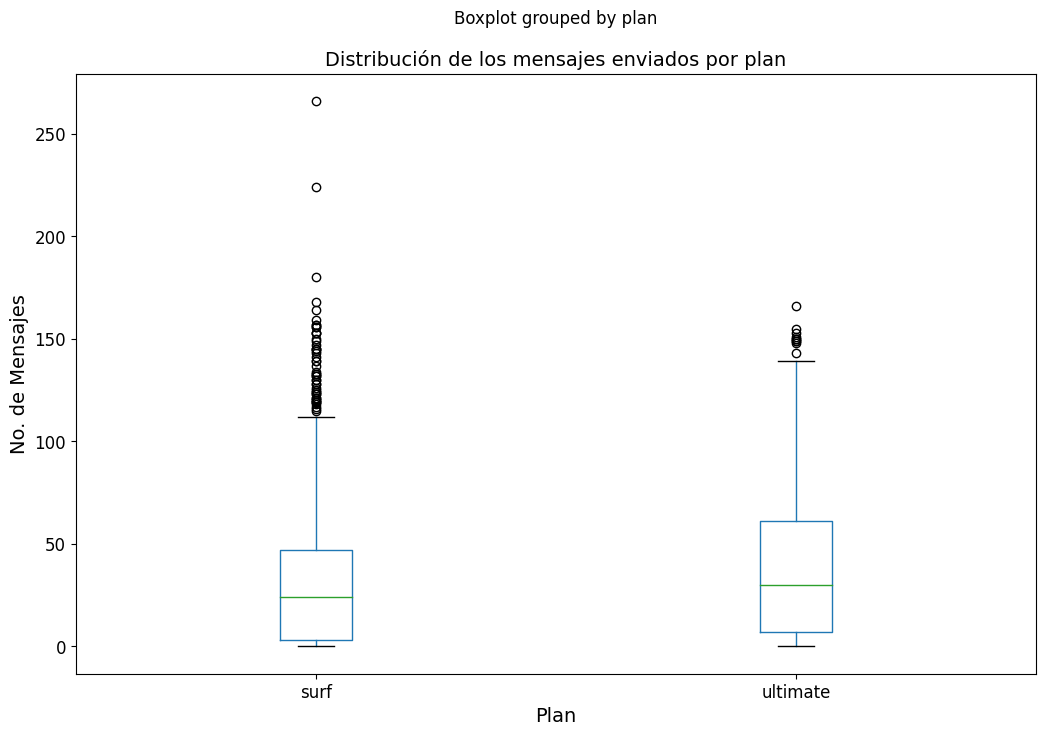

In [777]:
# Se traza un diagrama de caja para visualizar la distribución de los mensajes enviados
calls_mints_internet.boxplot(column= 'count_messages',
                             by= 'plan',
                             fontsize= 12,
                             grid= False,
                             figsize= [12,8]
                             )
plt.title('Distribución de los mensajes enviados por plan', fontsize= 14) # para colocar un título
plt.xlabel('Plan', fontsize= 14) # Para nombrar el eje x
plt.ylabel('No. de Mensajes', fontsize= 14) # Para nombrar el eje y
plt.show()

<span style="color:green"> **Conclusiones:**  
• En el gráfico de barras se puede observar que durabte todos los meses del año los usuarios del plan ultimate en promedio enviaron más mensajes.
• Con base en el histograma se observa que los mensajes enviados esta entre 0 y 5, para ambos planes se observa una distribución similar. Además el histrograma tiene un sesgo hacia la derecha, es decir no es una distribución simétrica. La cantidad de mensajes más frecuentes para el plan Surf son 0, mientras que para el plan ultimate también son 0.     
• Al calcular la media para ambos planes la cantidad de mensajes enviados es muy similar y ambos planes tienen una varianza muy grande, esto quiere decir que los datos están muy separados de la media. Con la desviación estandar podemos saber que el 68 % de los datos están entre 0 y 64.6 para el plan Surf y pararl plan Ultimate están entre 2.79 y 72.3.  
• Con el diagrama de caja podemos observar valores atípicos, ya que hay valores mayores que el valor máximo (1.5 veces el rango intercuartílico (IQR) del cuartil Q3). Lo anterior sucede para ambos planes. El valor máximo para el plan Surf es de 266 mensajes y para el plan Ultimate 166.
</span>

### 7.3 Internet <a id='internet_comportamiento'></a>

In [778]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Se agrupa por mes el DataFrame 'surf_plan' y se calcula el promedio del tráfico de internet (columna 'vol_internet')
# EL resultado se asigna a 'month_surf_mean_internet'
month_surf_mean_internet = surf_plan.groupby('month')['vol_internet'].mean()
month_surf_mean_internet


month
1     14.000000
2     30.000000
3     31.260870
4     28.880000
5     33.844156
6     37.515464
7     40.264463
8     40.277778
9     40.221649
10    41.987342
11    39.957597
12    43.949686
Name: vol_internet, dtype: float64

In [779]:
# Se agrupa por mes el DataFrame 'ultimate_plan' y se calcula el promedio del tráfico de internet (columna 'vol_internet')
# EL resultado se asigna a 'month_ultimate_mean_internet'
month_ultimate_mean_internet = ultimate_plan.groupby('month')['vol_internet'].mean()
month_ultimate_mean_internet

month
1     15.250000
2     39.714286
3     40.250000
4     38.428571
5     39.310345
6     35.851064
7     39.644068
8     42.619718
9     40.465116
10    41.556604
11    40.732283
12    44.377483
Name: vol_internet, dtype: float64

In [780]:
# se concatenan los Series 'month_surf_mean_internet' y 'month_ultimate_mean_internet'
surf_ultimate_mean_internet = pd.concat([month_surf_mean_internet, month_ultimate_mean_internet], axis='columns')
# Se renombran las columnas
surf_ultimate_mean_internet.columns = ['internet_mean_surf', 'internet_mean_ultimate']
# con reset_index() se reinicia el índice del DataFrame 'surf_ultimate_mean_messages'
surf_ultimate_mean_internet.reset_index(inplace= True)
surf_ultimate_mean_internet

,month,internet_mean_surf,internet_mean_ultimate
0,1,14.000000,15.250000
1,2,30.000000,39.714286
2,3,31.260870,40.250000
3,4,28.880000,38.428571
4,5,33.844156,39.310345
5,6,37.515464,35.851064
6,7,40.264463,39.644068
7,8,40.277778,42.619718
8,9,40.221649,40.465116
9,10,41.987342,41.556604


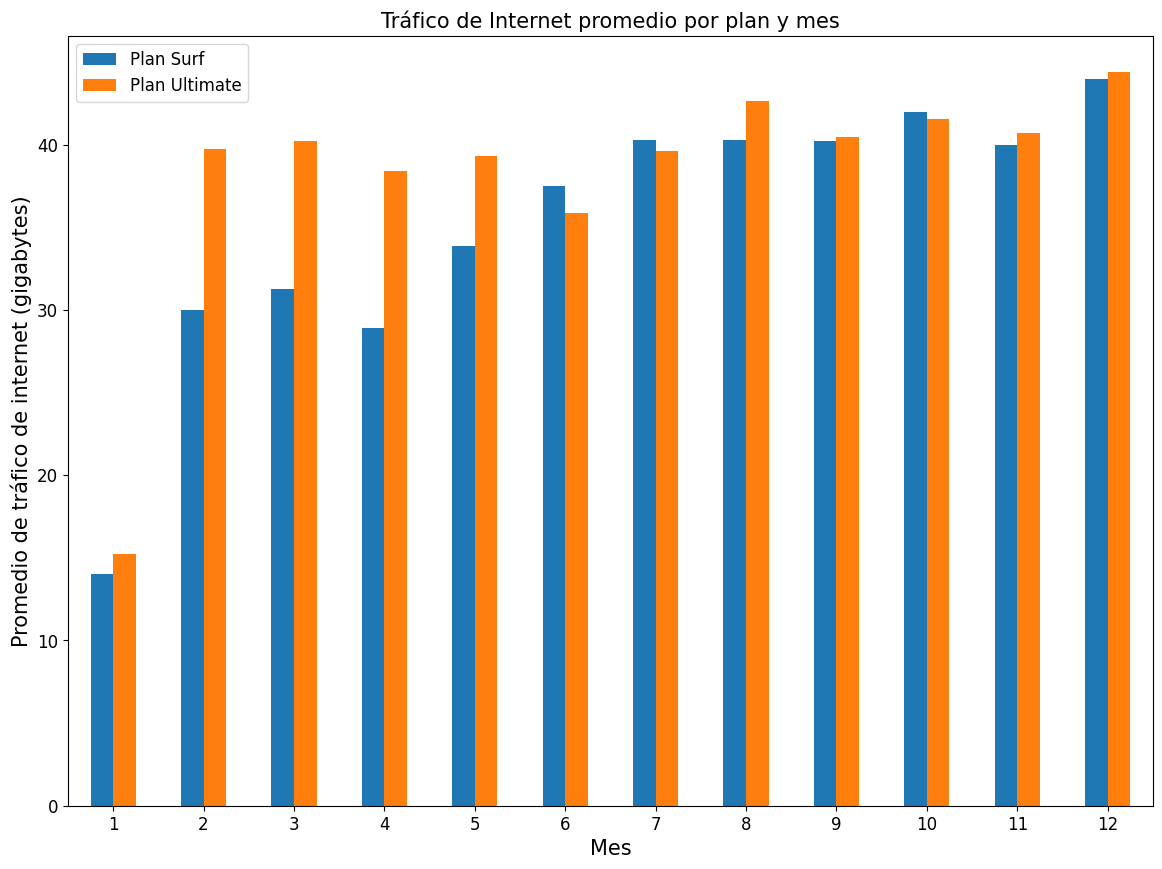

In [781]:
# Se grafica la cantidad promedio de tráfico de internet por cada plan y por cada mes
surf_ultimate_mean_internet.plot(x= 'month',
                       kind= 'bar',
                       figsize= [14,10],
                       fontsize= 12, 
                       rot= 360
                       )
plt.title('Tráfico de Internet promedio por plan y mes', fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Promedio de tráfico de internet (gigabytes)', fontsize=15)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12)
plt.show()

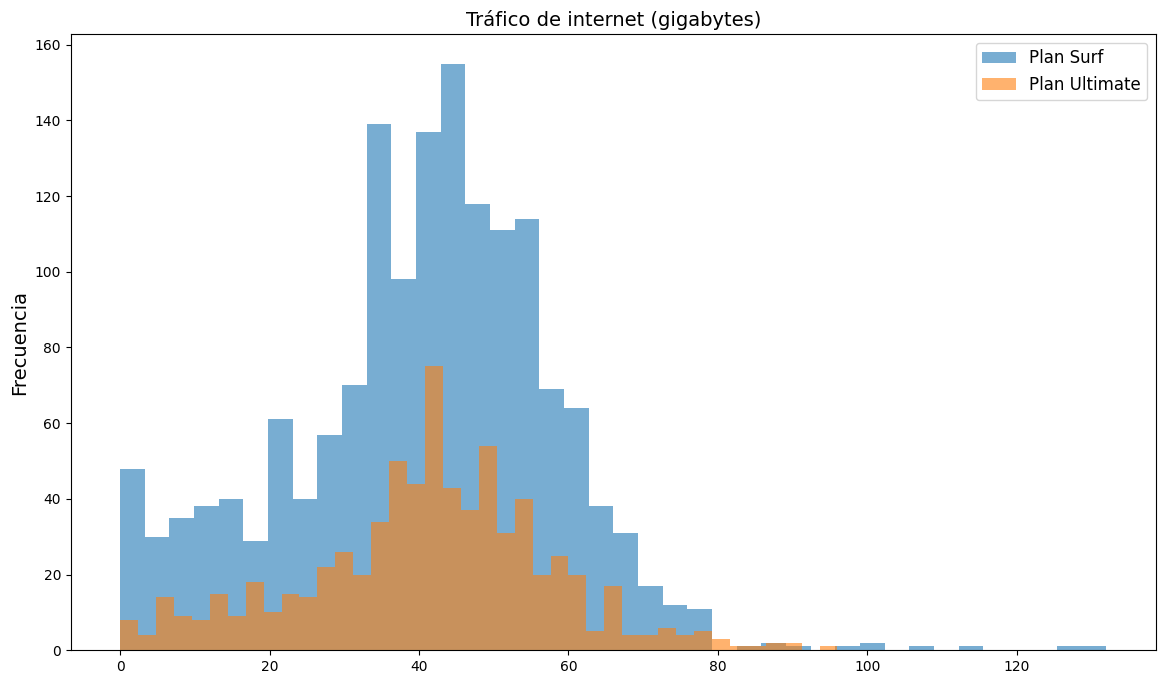

In [782]:
# A partir de los DataFrames 'surf_plan' y 'ultimate_plan' se crean sus respectivos histogramas en el mismo gráfico
surf_plan['vol_internet'].plot(kind='hist',
                              bins= 40, 
                              alpha= 0.6,
                              figsize= [14,8]
                             )
ultimate_plan['vol_internet'].plot(kind='hist',
                              bins= 40, 
                              alpha= 0.6,
                              figsize= [14,8]                              
                             )


plt.title('Tráfico de internet (gigabytes)', fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12) # para colocar las leyendas del gráfico
plt.show()

In [783]:
print('Plan Surf:')
# Se calcula la varianza con var() de los gigas usados.
print('La varianza de los gigas usados es:', round(surf_plan['vol_internet'].var(), 1))
# se calcula la moda de los datos con mode() de los gigas usados
print('La moda de los gigas usados es:', surf_plan['vol_internet'].mode()[0], 'y', surf_plan['vol_internet'].mode()[1])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(surf_plan['vol_internet'].describe())

Plan Surf:
La varianza de los gigas usados es: 318.3
La moda de los gigas usados es: 41.0 y 50.0
count    1573.000000
mean       40.140496
std        17.841862
min         0.000000
25%        30.000000
50%        42.000000
75%        52.000000
max       132.000000
Name: vol_internet, dtype: float64


In [784]:
print('Plan Ultimate:')
# Se calcula la varianza con var() de los gigas usados.
print('La varianza de los gigas usados es:', round(ultimate_plan['vol_internet'].var(), 1))
# se calcula la moda de los datos con mode() de los gigas usados
print('La moda de los gigas usados es:', ultimate_plan['vol_internet'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(ultimate_plan['vol_internet'].describe())

Plan Ultimate:
La varianza de los gigas usados es: 273.2
La moda de los gigas usados es: 42.0
count    720.000000
mean      41.080556
std       16.528701
min        0.000000
25%       32.000000
50%       42.000000
75%       51.000000
max       96.000000
Name: vol_internet, dtype: float64


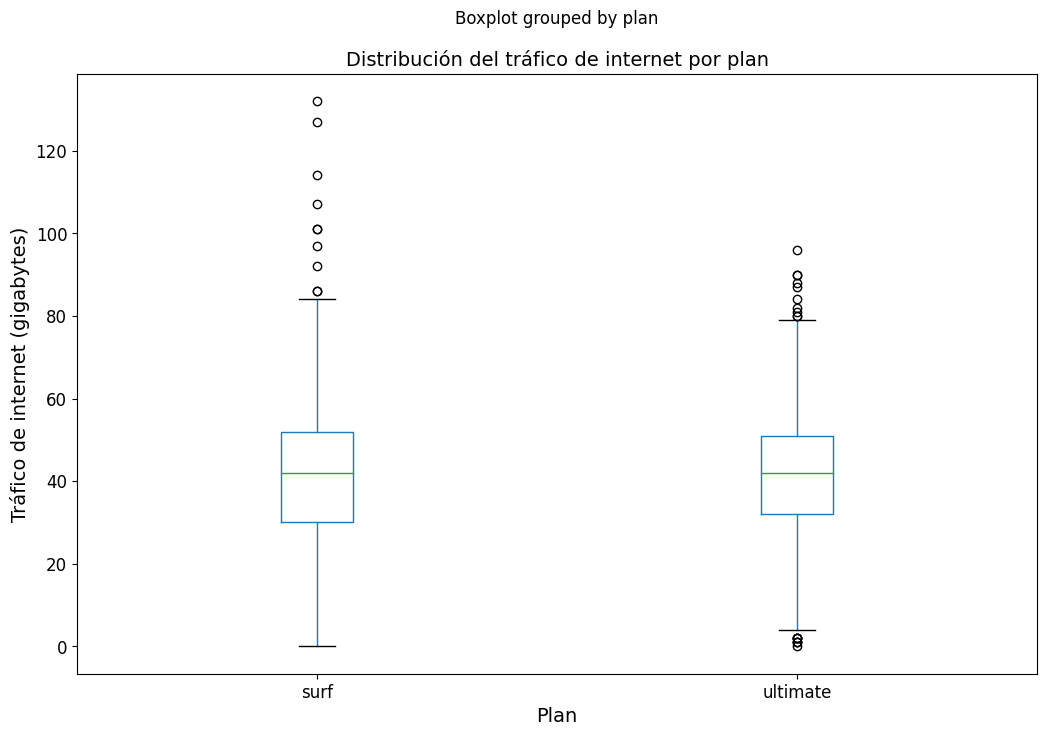

In [785]:
# Se traza un diagrama de caja para visualizar la distribución del tráfico de internet
calls_mints_internet.boxplot(column= 'vol_internet',
                             by= 'plan',
                             fontsize= 12,
                             grid= False,
                             figsize= [12,8]
                             )
plt.title('Distribución del tráfico de internet por plan', fontsize= 14) # para colocar un título
plt.xlabel('Plan', fontsize= 14) # Para nombrar el eje x
plt.ylabel('Tráfico de internet (gigabytes)', fontsize= 14) # Para nombrar el eje y
plt.show()

<span style="color:green">  **Conclusiones:**  
• En el gráfico de barras se puede observar que durante los meses de enero a mayo, los usuarios del plan ultimate usaron más gigabytes. A partir de febrero (mes 2) los usuarios en promedio excedieron el límite de los gigas incluidos en su plan. A partir de julio (mes 7) los usuarios o  usuarias del plan Surf tuvieron consumos similares a los clientes del plan Ultimate. Los usuarios o usuarias del plan Surf a partir de febrero excedieron en el doble el límite de gigas incluidos en su plan. En ambos planes se exceden los gigas incluidos en cada plan, lo cual ocurre a partir de febrero.   
• Con base en el histograma se observa que ambos planes tienen una distribución similar. Para el plan Surf los gigas usados más frecuentes son 41 y 50, mientras que para los clientes del plan ultimate es 42.  
• Al calcular la media para ambos planes el tráfico de internet es muy similar y para  ambos planes tienen una varianza muy grande, esto quiere decir que los datos están muy separados de la media. Lo mismo ocurre con la desviación estándar, sel 68 % de los datos se encuentran entre 22.3 y 57.98 para el plan Surf, para el plan Ultimate están entre 24.56 y 57.59.  
• Con el diagrama de caja podemos observar valores atípicos, ya que también hay valores mayores que el valor máximo (1.5 veces el rango intercuartílico (IQR) del cuartil Q3). Lo anterior sucede para ambos planes, lo cuál se podría deber a los usuarios que exceden el límite de su plan. Para el plan Ultimate también hay valores menores que el valor mínimo.
</span>

## 8 Ingreso <a id='ingreso'></a>

In [786]:
# Se compara la cantidad de tráfico de ingresos por usuarios por plan
# Se agrupa por mes el DataFrame 'surf_plan' y se calcula el promedio de los ingresos (columna 'usd_total_pay')
# EL resultado se asigna a 'month_surf_mean_internet'
month_surf_mean_revenue = surf_plan.groupby('month')['usd_total_pay'].mean()
month_surf_mean_revenue

month
1      50.000000
2     187.730000
3     206.810870
4     181.910600
5     225.810000
6     256.389691
7     285.236033
8     285.474383
9     280.281804
10    298.754557
11    279.771060
12    316.846352
Name: usd_total_pay, dtype: float64

In [787]:
# Se agrupa por mes el DataFrame 'ultimate_plan' y se calcula el promedio de los ingresos (columna 'usd_total_pay')
# EL resultado se asigna a 'month_ultimate_mean_revenue'
month_ultimate_mean_revenue = ultimate_plan.groupby('month')['usd_total_pay'].mean()
month_ultimate_mean_revenue

month
1      70.000000
2     164.000000
3     189.000000
4     161.333333
5     156.655172
6     145.510638
7     163.254237
8     174.605634
9     157.825581
10    164.235849
11    164.031496
12    183.205298
Name: usd_total_pay, dtype: float64

In [788]:
# se concatenan los Series 'month_surf_mean_revenue' y 'month_ultimate_mean_revenue'
surf_ultimate_mean_revenue = pd.concat([month_surf_mean_revenue, month_ultimate_mean_revenue], axis='columns')
# Se renombran las columnas
surf_ultimate_mean_revenue.columns = ['revenue_mean_surf', 'revenue_mean_ultimate']
# con reset_index() se reinicia el índice del DataFrame 'surf_ultimate_mean_messages'
surf_ultimate_mean_revenue.reset_index(inplace= True)
surf_ultimate_mean_revenue

,month,revenue_mean_surf,revenue_mean_ultimate
0,1,50.000000,70.000000
1,2,187.730000,164.000000
2,3,206.810870,189.000000
3,4,181.910600,161.333333
4,5,225.810000,156.655172
5,6,256.389691,145.510638
6,7,285.236033,163.254237
7,8,285.474383,174.605634
8,9,280.281804,157.825581
9,10,298.754557,164.235849


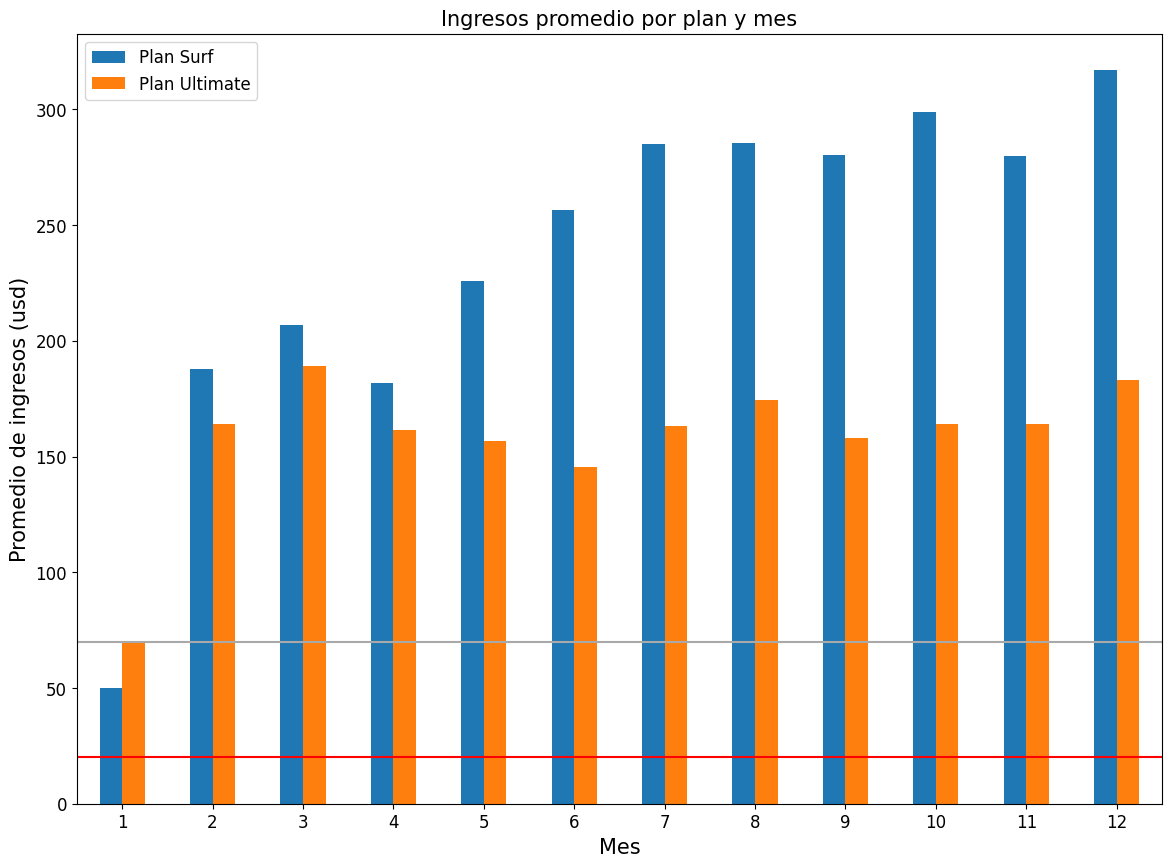

In [789]:
# Se grafica la cantidad promedio de ingresos por cada plan y por cada mes
surf_ultimate_mean_revenue.plot(x= 'month',
                       kind= 'bar',
                       figsize= [14,10],
                       fontsize= 12, 
                       rot= 360
                       )
plt.title('Ingresos promedio por plan y mes', fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Promedio de ingresos (usd)', fontsize=15)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12)
plt.axhline(y=20, xmin=0, xmax=12, color= 'red') # se agrega una línea para localizar la tarifa mensual del plan
plt.axhline(y=70, xmin=0, xmax=12, color= 'darkgrey') # se agrega una línea para localizar la tarifa mensual del plan
plt.show()

<span style="color:green"> Ahora los histogramas para los ingresos por plan se grafican por separado para una mejor visualización de los datos.
</span>

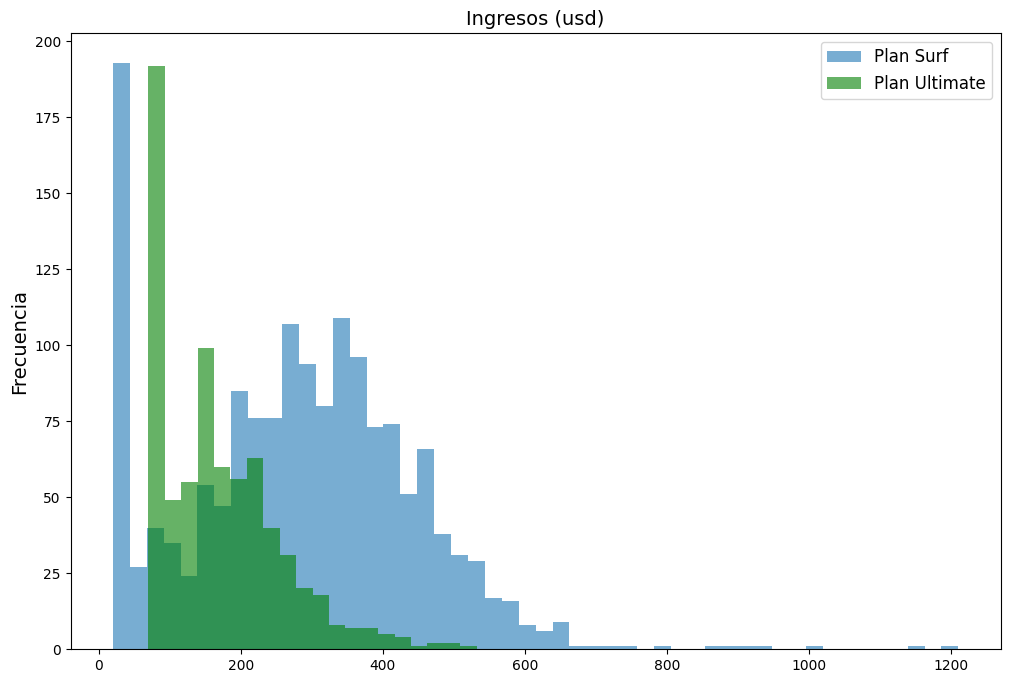

In [790]:
surf_plan['usd_total_pay'].plot(kind='hist',
                              bins= 50,
                              alpha= 0.6,
                              figsize= [14,8]
                               )

ultimate_plan['usd_total_pay'].plot(kind='hist',
                              bins= 20,
                              alpha= 0.6,
                              figsize= [12,8],
                              color= 'green'
                               )

plt.title('Ingresos (usd)', fontsize= 14) # para colocar un título
plt.ylabel('Frecuencia', fontsize= 14) # Para nombrar el eje y
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12) # para colocar las leyendas del gráfico
plt.show()

In [791]:
print('Plan Surf:')
# Se calcula la varianza con var() de los ingresos
print('La varianza de los ingresos es:', round(surf_plan['usd_total_pay'].var(), 1))
# se calcula la moda de los datos con mode() de los ingresos
print('La moda de los ingresos es:', surf_plan['usd_total_pay'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(surf_plan['usd_total_pay'].describe())

Plan Surf:
La varianza de los ingresos es: 26647.1
La moda de los ingresos es: 20.0
count    1573.000000
mean      282.117724
std       163.239312
min        20.000000
25%       173.510000
50%       290.000000
75%       390.000000
max      1210.370000
Name: usd_total_pay, dtype: float64


In [792]:
print('Plan Ultimate:')
# Se calcula la varianza con var() de los ingresos
print('La varianza de los ingresos es:', round(ultimate_plan['usd_total_pay'].var(), 1))
# se calcula la moda de los datos con mode() de los ingresos
print('La moda de los ingresos es:', ultimate_plan['usd_total_pay'].mode()[0])
# se emplea el método describe() para calcular los estadísticos descriptivos como la media, mediana, desviación estándar
print(ultimate_plan['usd_total_pay'].describe())

Plan Ultimate:
La varianza de los ingresos es: 7624.6
La moda de los ingresos es: 70.0
count    720.000000
mean     166.629167
std       87.318976
min       70.000000
25%       84.000000
50%      154.000000
75%      217.000000
max      532.000000
Name: usd_total_pay, dtype: float64


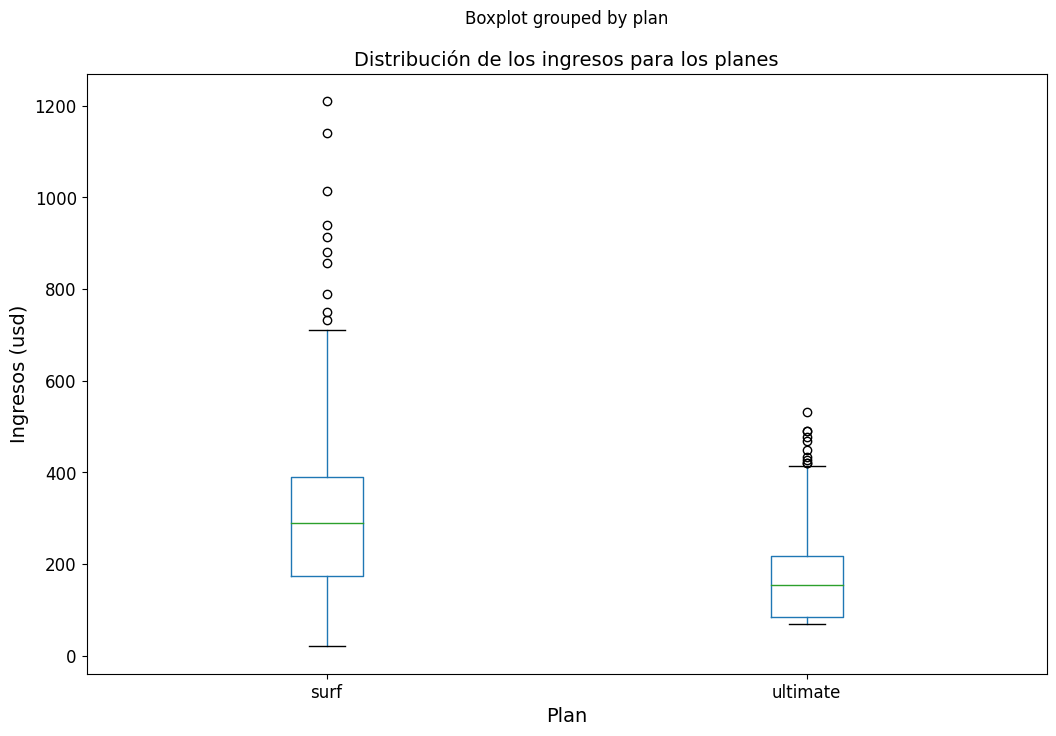

In [793]:
# Se traza un diagrama de caja para visualizar el ingreso para el plan surf
calls_mints_internet.boxplot(column= 'usd_total_pay',
                             by= 'plan',
                             fontsize= 12,
                             grid= False,
                             figsize= [12,8]
                             )
plt.title('Distribución de los ingresos para los planes', fontsize= 14) # para colocar un título
plt.xlabel('Plan', fontsize= 14) # Para nombrar el eje x
plt.ylabel('Ingresos (usd)', fontsize= 14) # Para nombrar el eje y
plt.show()

In [794]:
# Se cuentan los usuarios para cada plan
calls_mints_internet['plan'].value_counts()

plan
surf        1573
ultimate     720
Name: count, dtype: int64

<span style="color:green"> 
La cantidad promedio de minutos consumidos, mensajes enviados, internet consumido e ingresos se grafica para cada plan para observar su evolución a lo largo de los meses.  
</span>

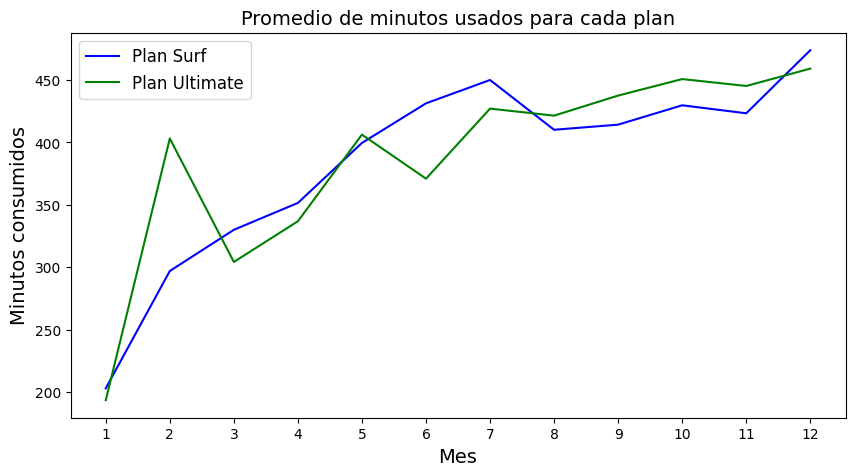

In [795]:
# se grafican la cantidad de minutos promedio para cada plan en un gráfico de líneas
surf_ultimate_mean.plot(x= 'month',
                        figsize= (10, 5),
                        xticks= range(1,13,1),
                        color=['blue', 'green']
                       )

plt.title('Promedio de minutos usados para cada plan', fontsize= 14)
plt.xlabel('Mes', fontsize= 14)
plt.ylabel('Minutos consumidos', fontsize= 14)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12)
plt.show()

<span style="color:green"> 

Para ambos planes la cantidad de minutos usados aumenta a partir del mes de abril, unicamente en febrero los cliente ultimate enviaron más mensajes. Los usuarios o usuarias de ambos planes no excedieron los límites de su plan.
</span>

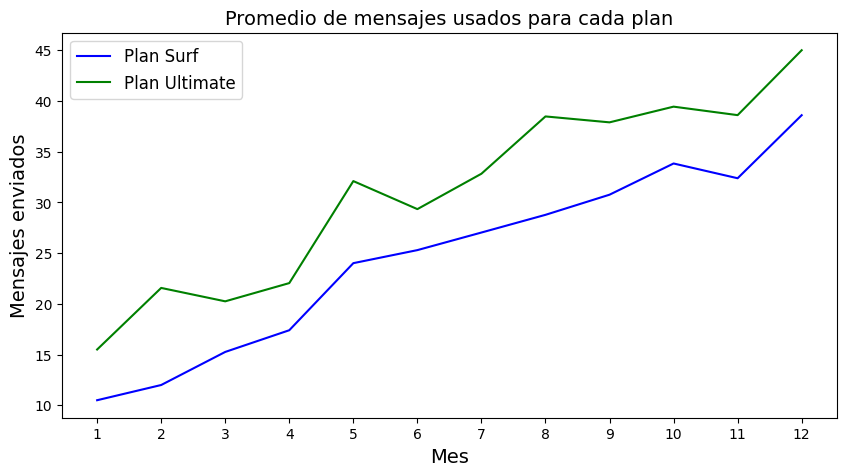

In [796]:
# se grafican la cantidad de mensajes promedio consumidos para cada plan en un gráfico de líneas
surf_ultimate_mean_messages.plot(x= 'month',
                        figsize= (10, 5),
                        xticks= range(1,13,1),
                        color=['blue', 'green']
                       )

plt.title('Promedio de mensajes usados para cada plan', fontsize= 14)
plt.xlabel('Mes', fontsize= 14)
plt.ylabel('Mensajes enviados', fontsize= 14)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12)
plt.show()

<span style="color:green"> 
↑
En ambos planes no excedieron el límite de mensajes, los clientes ultimate enviaron más mensajes a partir de febrero. 
</span>

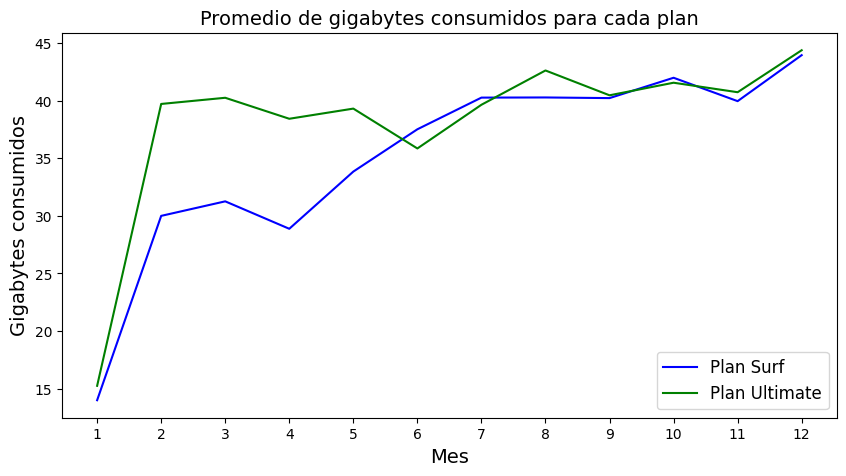

In [797]:
# se grafican la cantidad de gigabytes promedio consumidos para cada plan en un gráfico de líneas
surf_ultimate_mean_internet.plot(x= 'month',
                        figsize= (10, 5),
                        xticks= range(1,13,1),
                        color=['blue', 'green']
                       )

plt.title('Promedio de gigabytes consumidos para cada plan', fontsize= 14)
plt.xlabel('Mes', fontsize= 14)
plt.ylabel('Gigabytes consumidos', fontsize= 14)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12)
plt.show()

<span style="color:green"> 
↑
A partir de febrero en ambos planes se excedieron en el límite de gigas, los clientes ultimate enviaron más mensajes a partir de febrero hasta mayo. Los usuarios o usuarias del plan Surf excedieron el límite de gigas el doble a partir de febrero.
</span>

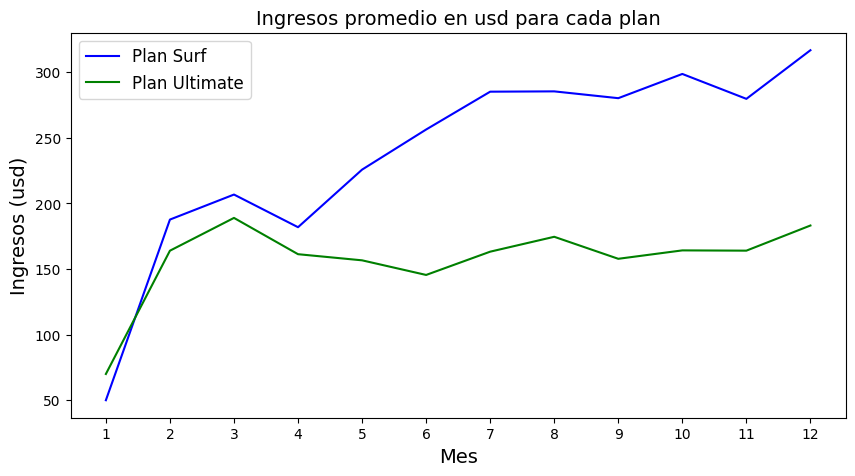

In [798]:
# se grafican el ingreso promedio para cada plan en un gráfico de líneas
surf_ultimate_mean_revenue.plot(x= 'month',
                        figsize= (10, 5),
                        xticks= range(1,13,1),
                        color=['blue', 'green']
                       )

plt.title('Ingresos promedio en usd para cada plan', fontsize= 14)
plt.xlabel('Mes', fontsize= 14)
plt.ylabel('Ingresos (usd)', fontsize= 14)
plt.legend(['Plan Surf', 'Plan Ultimate'], fontsize= 12)
plt.show()

<span style="color:green"> 
↑
Los usuarios o usuarias del plan Surf excedieron pagaron más dinero a partir de abril respecto a los clientes ultimate, además, la tarifa aumenta, mientras que la tarifa de los clientes ultimate disminuye.  
</span>

<span style="color:green"> **Conclusiones:**  
• En el gráfico de barras se puede observar que el ingreso es mayor para los usuarios con el plan Surf. Los usuarios o usuarias con el plan Surf exceden en la mayoría de los meses la tarifa del plan, la tarifa es de 20 usd, mientras que, los usuarios con el plan ultimate también exceden la tarifa del plan (70 usd). Sin embargo, los clientes con el plan Surf exceden la tarifa en mayor proporción.  
• Con base en el histograma para los usuarios con el plan Surf la mayoría de los ingresos están en 20 usd, pero hay un sesgo a la derecha, esto se debe a datos atípicos y que se puede verificar en el diagrama de caja. Lo anterior puede ser consecuencia de los usuarios que pagaron más de su tarifa base.    
• Para los usuarios con el plan Ultimate los ingresos en su mayoría son menores de 70 usd, también hay valores que provocan un sesgo a la derecha del histograma, que pueden ser los usuarios o usuarias que se excedieron en su tarifa mensual, con el diagrama de caja se puede observar que hay valores atípicos, ya que también hay valores mayores que el valor máximo.  
• Al calcular la media para ambos planes los ingresos son diferente, pero los usuarios con el plan Surf pagaron en promedio  282.1 usd, 14 veces más de su tarifa base. Por otro lado, los clientes del plan Ultimate en promedio ppagaron 166.6 usd, alrededor de dos veces más de su tarifa base, a pesar que se excedieron en su pago base este es menor en comparación con la cantidad que pagaron los usuarios o usuarias del plan Surf. Para  ambos planes tienen una varianza muy grande, esto quiere decir que los datos están muy separados de la media.  
• El plan Ultimate tiene menos usuarios 720, mientras que el plan Surf tiene más usuarios 1573, estos últimos son los que pagan el doble de su tarifa base al mes.
</span>

## 9 Prueba las hipótesis estadísticas <a id='hipotesis'></a>

<span style="color:green">  **Primera prueba de hipótesis**  
Ho: Los ingresos promedios de los usuarios de los planes Ultimate y Surf son iguales.  
Ha: Los ingresos promedios de los usuarios de los planes Ultimate y Surf son diferentes.  
Para probar la hipótesis se empleará la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.  
El DataFrame `surf_plan` y `ultimate_plan` tienen la información de los ingresos de cada plan y son los que se pasarán como argumento en los parámetros `array1` y `array2`, respectivamente.  
    Previamente se calculó la varianza para cada plan y son diferentes (plan surf= 2965.0 y plan ultimate= 129.8), con base en lo anterior en el parámetro `equal_var` se establecerá como `False` ya que las varianzas son diferentes.  
    El valor de alfa será de 5 % (0.05).
</span>

In [800]:
# Prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_plan'
results_plan = st.ttest_ind(surf_plan['usd_total_pay'], ultimate_plan['usd_total_pay'], equal_var= False)

print('El valor p es:', results_plan.pvalue)

if results_plan.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 2.3248333100718407e-97
Se rechaza la hipótesis nula


<span style="color:green"> De acuerdo al resultado, podemos rechazar la hipótesis nula de que el ingreso promedio de los planes Ultimate y Surf son iguales. El resultado indica que los ingresos de los usuarios difiere para cada plan surf o ultimate con una confianza estadística del 95%.
</span>

<span style="color:green">  **Segunda prueba de hipótesis**  
Ho: Los ingresos promedios de los usuarios del área NY-NJ es igual al de las otras regiones.  
Ha: Los ingresos promedios de los usuarios del área NY-NJ es diferente al de las otras regiones. 
Para probar la hipótesis también se empleará la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.  
El DataFrame `surf_plan` y `ultimate_plan` tienen la información de los ingresos de cada plan y son los que se pasarán como argumento en los parámetros `array1` y `array2`, respectivamente.  
    El parámetro `equal_var` se establecerá como `True` (prederterminado).  
    El valor de alfa será de 5 % (0.05).
</span>

In [801]:
# El DatFrame df_users tiene la información del área a la que corresponden los usuarios
# Se imprime una muestra de df_users
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA


In [802]:
# Se filtra el DataFrame df_users en donde sólo se muestren el área NY-NJ
df_users[df_users['state'] == 'NY-NJ']

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state


<span style="color:green"> Al revisar la información del DataFrame filtrado `df_users` no se encontró el estado o área sólo con `NY-NJ`, sin embargo, para el área `NY-NJ-PA` si hay información y las ciudad para estos estados si pertenecen a estos, Por lo tanto se usará la información de esta área para la prueba de hipótesis.  
    A continuación, se muestran los datos filtrados para el área `NY-NJ-PA`.
</span>

In [803]:
# Se filtra el DataFrame df_users en donde sólo se muestren el área NY-NJ-PA
# El resultado se asigna a area_NY_NJ_PA
df_users[df_users['state'] == 'NY-NJ-PA'].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
14,1014,Edmundo,Simon,61,New York-Newark-Jersey City,2018-11-25,surf,NaT,NY-NJ-PA
22,1022,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,2018-09-07,NY-NJ-PA
24,1024,Yuki,Tyson,74,New York-Newark-Jersey City,2018-08-21,surf,NaT,NY-NJ-PA
27,1027,Georgeanna,Cardenas,38,New York-Newark-Jersey City,2018-06-26,surf,NaT,NY-NJ-PA
31,1031,Lane,Martin,52,New York-Newark-Jersey City,2018-07-15,ultimate,NaT,NY-NJ-PA


<div class="alert alert-block alert-info">
<b>  </b> <a class="tocSkip"></a>  
    
No se encontró un área que sea solamente NY-NJ, se ha decidido emplear el área NY-NJ-PA para la prueba de hipótesis.
</div>


<span style="color:green"> El DataFrame `calls_mints_internet` tiene la información del ingreso total por mes para cada usuario, entonces es necesario fusionar los datos con el DataFrame `df_users` para añadir la columna del estado ('state').  
    Esta tarea de fusionar los DataFrames se puede hacer con un merge(), ambos DataFrames tienen en común la columna `user_id`. 
    Se crea un DataFrame llamado `df_users_id_state` a partir del DataFrame `df_users` convervando unicamente las columnas `user_id` y `state`. Después se hace el merge entre ambos DataFrames para agregar el estado.
</span>

In [804]:
# Se guardan las columnas de 'user_id' y 'state' en 'df_users_id_state'
df_users_id_state = df_users[['user_id', 'state']]
df_users_id_state.head()

,user_id,state
0,1000,GA
1,1001,WA
2,1002,NV
3,1003,OK
4,1004,WA


In [805]:
# Se hace el merge entre 'calls_mints_internet' y 'df_users_id_state'
calls_mints_internet_state = calls_mints_internet.merge(df_users_id_state, on= 'user_id')
calls_mints_internet_state.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay,usd_total_pay,state
0,1000,ultimate,12,16.0,124.0,11.0,4.0,70,70.00,GA
1,1001,surf,8,22.0,182.0,30.0,21.0,20,80.00,WA
2,1001,surf,9,38.0,315.0,44.0,41.0,20,280.00,WA
3,1001,surf,10,47.0,393.0,53.0,50.0,20,370.09,WA
4,1001,surf,11,49.0,426.0,36.0,49.0,20,360.00,WA


<span style="color:green"> Ahora se filtran el DataFrame en donde el estado sea `NY-NJ-PA` y DataFrame en donde sólo se tengan las otras regiones.

</span>

In [806]:
# Se filtra el DataFrame 'calls_mints_internet_state' donde sólo se tenga el área NY-NJ-PA 
df_NY_NJ_PA = calls_mints_internet_state[calls_mints_internet_state['state'] == 'NY-NJ-PA']
# se imprime una muestra del DataFrame resultante
df_NY_NJ_PA.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay,usd_total_pay,state
56,1014,surf,11,23.0,163.0,9.0,2.0,20,20.00,NY-NJ-PA
57,1014,surf,12,125.0,1114.0,64.0,17.0,20,58.84,NY-NJ-PA
75,1022,surf,5,32.0,302.0,0.0,12.0,20,20.00,NY-NJ-PA
76,1022,surf,6,65.0,490.0,0.0,65.0,20,520.00,NY-NJ-PA
77,1022,surf,7,56.0,475.0,0.0,33.0,20,200.00,NY-NJ-PA


In [807]:
# Se filtra el DataFrame 'calls_mints_internet_state' donde sólo se tenga el resto de áreas
# Se emplea ~ para obtener el resultado contrario del filtro
df_otras_areas = calls_mints_internet_state[~(calls_mints_internet_state['state'] == 'NY-NJ-PA')]
df_otras_areas.head()

,user_id,plan,month,total_calls,sum_minutes,count_messages,vol_internet,monthly_pay,usd_total_pay,state
0,1000,ultimate,12,16.0,124.0,11.0,4.0,70,70.00,GA
1,1001,surf,8,22.0,182.0,30.0,21.0,20,80.00,WA
2,1001,surf,9,38.0,315.0,44.0,41.0,20,280.00,WA
3,1001,surf,10,47.0,393.0,53.0,50.0,20,370.09,WA
4,1001,surf,11,49.0,426.0,36.0,49.0,20,360.00,WA


<span style="color:green"> Ahora se hace la prueba de hipótesis

</span>

In [808]:
# Prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_area'
results_area = st.ttest_ind(df_NY_NJ_PA['usd_total_pay'], df_otras_areas['usd_total_pay'], equal_var= False)

print('El valor p es:', results_area.pvalue)

if results_area.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')


El valor p es: 0.004632562058700096
Se rechaza la hipótesis nula


<span style="color:green"> Con base en el resultado del valor p se rechaza la hipótesis nula de que los ingresos promedios de los usuarios del área NY-NJ_PA es igual al de las otras regiones con una confianza estadística del 95%., ya que  existe una diferencia en los ingresos de acuerdo a la región, en este caso si hay una diferencia entre el área de NY-NJ-PA y el resto de áreas.

</span>

## 10 Resumen general de los pasos realizados: <a id='pasos'></a>

<span style="color:green"> 
Para trabajar con todo el conjunto de datos se importaron las librerías necesarias y se importaron los Datasets. Después se hizo un exploración de cada DatFrame con `info()` para detectar de manera general la cantidad de datos, columnas y valores ausentes. Posteriormente, los datos se procesaron para cada DataFrame encontrando y eliminando los valores duplicados y ausentes, así como detectar el tipo de dato de las columnas.  

Se corrigieron los datos en donde se consideró importante hacerlo, como cambiar los tipos de datos. Además, se enriquecieron los DataFrames agregando más columnas y redondeando algunos valores numéricos de ciertas columnas. También se buscaron los valores ausentes y duplicados, en este caso no se encontraron.

Se realizaron algunos ``merge()`` para unir diferentes DataFrames, ya que la información para hacer los análisis está en varios conjunto de datos. De igual forma se utilizó ``concat()`` para unir algunos Series, porque estos se complementaban para completar la información y a partir del DataFrame resultante hacer los diferentes gráficos. Cuando se unieron los DataFrames de las llamadas, minutos, mensajes e Internet, en algunos casos habia valores  nulos (`NaN`), ya que en determinado mes el usuario o usuaria sólo usó los minutos para llamadas, mensajes o Internet, los otros servicios no los usó, pero se decidió dejarán así estos valores nulos y no sustituirlos con 0, debido a que podría afectar los calculos posteriores.
 
Se crearon tres funciones cada una para calcular el costo extra de minutos, mensajes o gygas si el usuario o usuaria se excedió en el consumo. Y una cuarta función se creó para calcular el pago total, en donde a la tarifa base se sumó el costo extra de los servicios consumidos si el cliente se excedia de su límite.
    
Se hicieron dos pruebas de hipótesis, para ambas pruebas se seleccionó `scipy.stats.ttest_ind(array1, array2, equal_var)` ya que se están comparando las medias de dos poblaciones. Previo a realizar las pruebas de hipótesis, los valores nulos de la columna `usd_total_pay` de cada DataFrame se tuvieron que sustituir con 0, ya que si no se hacia de es manera la prueba no hacia ningún cálculo.
</span>


## 11 Conclusión general <a id='conclusion'></a>
<span style="color:green"> **Conclusiones:**  
• Los usuarios o usuarias del Plan Surf pagan más de su tarifa mensual de 20 usd, 14 veces más su tarifa base ya que pagan en promedio 282.1 usd. Mientras que los usuarios o usuarias ultimate pagan en promedio 166.6 usd, que también se exceden de su tarifa base pero en menor medida que los usuarios Surf. Sin embargo, hay una variabilidad muy alta de los datos ya que sus varianzas son muy grandes.  
• Asimismo, para los minutos de las llamadas, mensajes y los gigabytes la varianza es muy alta para ambos planes, lo que sugiere que hay una variabilidad en los datos. Lo anterior puede hacer que sea más difícil tener conclusiones precisas de los datos.  
• En ambos planes los usuarios o usuarias se exceden en los límites de sus planes, ya que los diagramas de caja se pudo observar que hay valores atípicos, ya que son mayores al valor máximo. Lo anterior se puede corroborar con los histogramas, ya que en algunos casos tienen un sesgo a la derecha. Además, la distribución de los datos no es menor a la cantidad de minutos, mensajes o gigas que incluye su plan.  
• El plan Surf tiene más usuarios o usurias que el plan Ultimate.  
• De acuerdo a la primera prueba de hipótesis, podemos rechazar la hipótesis nula de que el ingreso promedio de los planes Ultimate y Surf son iguales. El resultado indica que los ingresos de los usuarios difiere para cada plan surf o ultimate.  
• Y el resultado de la segunda prueba de hipótesis indica que los ingresos para el área existe una diferencia en los ingresos de acuerdo a la región, en este caso hay una diferencia entre el área de NY-NJ-PA y el resto de áreas.  
</span>